##1 Clasificacion con Naive Bayes
###1-Importacion de datos


In [50]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
solicitantes= pd.read_excel("/content/drive/MyDrive/Analitica de negocios/Nuevo0. SolicitantesCrédito.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###2-Limpieza de datos


In [51]:
solicitantes.shape

(8378, 35)

In [52]:
#Elimino las filas donde 'PreApr' esta vacia
XD = solicitantes.dropna(subset="PreApr")

In [53]:
XD.shape

(5842, 35)

In [54]:
solicitantes.info

<bound method DataFrame.info of       Unnamed: 0  Edad    Sexo Estado civil  Hijos  Perscargo  Estrato  \
0              1    38      NR       Casado      1          0        3   
1              2    51      NR     Separado      6          1        4   
2              3    37   Mujer       Casado      2          0        3   
3              4    29      NR     Separado      1          0        2   
4              5    42   Mujer       Casado      3          4        2   
...          ...   ...     ...          ...    ...        ...      ...   
8373        8374    31  Hombre      Soltero      2          0        5   
8374        8375    38  Hombre     Separado      0          0        3   
8375        8376    43   Mujer       Casado      1          2        2   
8376        8377    37   Mujer       Casado      1          2        3   
8377        8378    24      NR      Soltero      0          0        2   

     Nivel de estudios  Tipo de contrato  Ingresos  ...  Plazo    Cuota (COP)  \
0            Bachiller           Ninguno   5424576  ...     48   82691.506204   
1              Técnico           Ninguno   1144064  ...     36   22781.212598   
2            Tecnólogo        Indefinido   2069853  ...     36   46294.596244   
3            Tecnólogo           Ninguno   1893080  ...     24   69564.950015   
4      Especializacion           Ninguno   3000367  ...     24  112478.307883   
...                ...               ...       ...  ...    ...            ...   
8373         Bachiller        Indefinido   5891088  ...     48  115108.056436   
8374         Bachiller  Labor Contratada   3092079  ...     36   96789.562091   
8375         Tecnólogo           Ninguno   2542007  ...     36   49713.608249   
8376         Tecnólogo        Indefinido   5677067  ...     36  163602.818587   
8377         Tecnólogo        Indefinido   1950392  ...     36   69024.928055   

                ConoCliente          Garantia            RespPat  \
0        Buenas Referencias      Sin Codeudor     Sin Patrimonio   
1        Buenas Referencias      Sin Codeudor  Prop.sin Hipoteca   
2        Buenas Referencias  Con Codeudor(es)     Sin Patrimonio   
3        Buenas Referencias  Con Codeudor(es)     Sin Patrimonio   
4        Buenas Referencias  Con Codeudor(es)     Sin Patrimonio   
...                     ...               ...                ...   
8373  Buena Experiencia CFB      Sin Codeudor     Sin Patrimonio   
8374     Buenas Referencias      Sin Codeudor  Prop.sin Hipoteca   
8375     Buenas Referencias      Sin Codeudor     Sin Patrimonio   
8376     Buenas Referencias  Con Codeudor(es)     Sin Patrimonio   
8377     Buenas Referencias      Sin Codeudor     Sin Patrimonio   

                      MoraCome  PreApr  Prob.Default (PD)       Score  \
0     Con Experiencia sin Mora     1.0           0.041659  582.478943   
1     Con Experiencia sin Mora     1.0           0.234951  479.839966   
2     Con Experiencia sin Mora     0.0           0.170330  417.653107   
3     Con Experiencia sin Mora     1.0           0.201659  316.791107   
4     Con Experiencia sin Mora     1.0           0.140929  441.809570   
...                        ...     ...                ...         ...   
8373  Con Experiencia sin Mora     1.0           0.035120  659.471375   
8374  Con Experiencia sin Mora     1.0           0.101976  465.011536   
8375  Con Experiencia sin Mora     1.0           0.156707  423.237305   
8376  Con Experiencia sin Mora     1.0           0.037719  592.670837   
8377  Con Experiencia sin Mora     NaN                NaN         NaN   

           LGD  
0     0.063702  
1     0.465636  
2     0.290071  
3     0.278389  
4     0.203359  
...        ...  
8373  0.066962  
8374  0.165936  
8375  0.247763  
8376  0.051356  
8377       NaN  

[8378 rows x 35 columns]>

In [55]:
XD = XD[["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos", "Egresos", "Monto (EAD)", "Plazo", "Cuota (COP)"]]
XD

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [56]:
yd = solicitantes['PreApr'].dropna()

### 3-Implementacion del modelo Naive Bayes

In [57]:
## Importo las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
## Convierto los datasets a arrays
XDArray = np.array(XD, dtype=float)
ydArray = np.array(yd, dtype=float)

In [59]:
XDArray

array([[3.80000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        2.81503004e+06, 4.80000000e+01, 8.26915062e+04],
       [5.10000000e+01, 6.00000000e+00, 1.00000000e+00, ...,
        6.30143930e+05, 3.60000000e+01, 2.27812126e+04],
       [3.70000000e+01, 2.00000000e+00, 0.00000000e+00, ...,
        1.28054021e+06, 3.60000000e+01, 4.62945962e+04],
       ...,
       [3.80000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        2.67726552e+06, 3.60000000e+01, 9.67895621e+04],
       [4.30000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        1.37511242e+06, 3.60000000e+01, 4.97136082e+04],
       [3.70000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        4.52536592e+06, 3.60000000e+01, 1.63602819e+05]])

In [60]:
ydArray

array([1., 1., 0., ..., 1., 1., 1.])

In [61]:
##Importo el modelo de Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [62]:
# Creo la variable que aloja el modelo
modeloNB = GaussianNB()

In [63]:
# 1. ENTRENO EL MODELO (train)
modeloNB.fit(XDArray, ydArray)

GaussianNB()

In [64]:
# 2. Genero las predicciones para los solicitantes con clasificación (test)
ydPred = modeloNB.predict(XDArray)
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [66]:
cm = confusion_matrix(ydArray, ydPred)
cm

array([[2539,  420],
       [1041, 1842]])

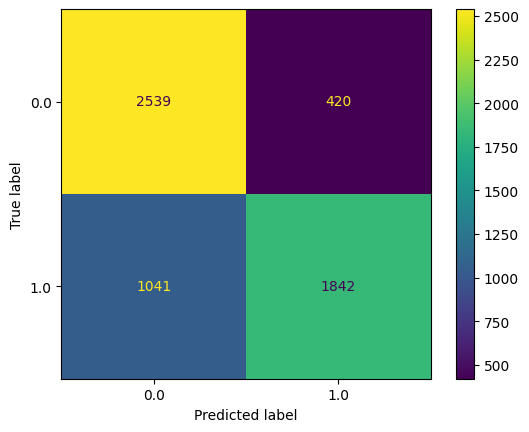

In [67]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=modeloNB.classes_)
disp.plot()
plt.show()

### 5. Metricas de evaluacion del modelo

---



In [68]:
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

In [82]:
## Exactitud (Accuracy)
## Numero de predicciones correctas sobre el total de predicciones
exactitud = (VP+VN)/cm.sum()
print(f'La exactitud (accuracy) del modelo es de {exactitud:.2%}')

La exactitud (accuracy) del modelo es de 74.99%


#### Explicacion de la Exactitud
Podemos concluir que la exactitud de este modelo no es muy precisa, lo cual no nos ayuda mucho en este modelo de negocio por que nos quiere decir que aproximadamente 3 de 4 predicciones hechas por este modelo seran acertadas, esto esta mal ya que implicaria que otorgariamos un credito a la persona incorrecta casi siempre. La exactitud de este modelo se redujo 1% con respecto al anterior modelo lo cual no representa un gran cambio aunque no es un buen indicador ya que implica que la precision de este modelo disminuyo

In [70]:
# Tasa de Error
## Numero de predicciones incorrectas sobre el total de predicciones
error = 1- exactitud
print(f'El error del modelo es de {error:.2%}')

El error del modelo es de 25.01%


#### Explicacion de Tasa de Error
Podemos observar que la tasa de error es bastante alta, lo cual pudimos evidenciar en la métrica anterior. Esto es un riesgo muy alto en nuestro modelo. Notamos que cada vez aumenta mas la tasa de error al igual que la exactitud en este caso fue de mas de 1%. Esto significa que tenemos un probabilidad del 25% de dar un credito a la persona incorrecta.

In [71]:
## Precision
# Que tan cerca esta un resultado del valor verdadero. De los cuales el modelo calcula como verdaderos, cuales son realmente verdaderos.
precision = VP / (FP+VP)
print(f' La precision del modelo es de {precision :.2%}')

 La precision del modelo es de 81.43%


#### Explicacion de Precisión
La precision del modelo no tuvo una notable mejora en este caso, y todavia no es suficiente para lo que estamos buscando ya que tenemos un 20% el cual estamos dejando a la deriva o probablemente nos equivocaremos en la asgincacion de este credito.

In [72]:
# Sensibilidad (Recall)
# La sensibilidad es la cantidad de positivos bien calificados por el modelo respecto al total de positivos
sensibilidad = VP / (FN+VP)
print(f' La sensibilidad del modelo es de {sensibilidad :.2%}')

 La sensibilidad del modelo es de 63.89%


####Explicacion Sensibilidad
Esta metrica nos ayuda para darnos uma idea de que tan bien el modelo identifica correctamente los casos positivos, es bastante preocupante estos numeros ya que nos diria que casi el 64% de las solicitudes no deberian ser sido asignadas. Por el contrario si este numero fuera bajo significaria que el modelo esta recahzando muchas solicitudes que deberian ser aceptadas. En este caso este numero cayó lo que nos diria que se esta rechazando incorrectamente algunos creditos.

In [73]:
# Especificidad
 # La cantidad de negativos bien clasificados por el modelo respecto al total de negativos
especificidad = VN/(VN+FP)
print(f' La especificidad del modelo es de {especificidad :.2%}')


 La especificidad del modelo es de 85.81%


#### Explicacion especificidad
Esta es la capacidad que tiene el sistema para identificar la exactitud y el buen funcionamiento del sistema, lo que quiere decir que si se rechacen correctamente los creditos que deben ser rechazados, en este caso tenemos una especificidad alta pero que no es casi perfecta lo cual nos juega un papel pesimista ya que todavia se esta cometiendo muchos errores en la asignacion de creditos.
En este caso aumento esta metrica pero en un valor no muy significativo lo que nos dice que debemos continuar en la mejora de este modelo hadta llegar a una tasa casi perfecta.

### 6. Pronostico de la preaprobacion para solicitantes nuevos

In [74]:
## Filtro los registros que no tienen datos en 'PreApr'
XDGener = solicitantes[solicitantes['PreApr'].isna()]

In [75]:
# Guardo las variables independientes (XD) de los solicitantes que aun no estan clasificados. Esto, para la generalizacion del modelo
XDGener = XDGener[["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos", "Egresos", "Monto (EAD)", "Plazo", "Cuota (COP)"]]

In [76]:
## Convierto el dataset a un array para poder ingresarlo al modeloNB
XDGenerArray = np.array(XDGener, dtype=float)



In [77]:
# Le solicito al modelo que le haga el pronostico a estos solicitantes que aun no tienen informacion de su clasificacion ('PreApr esta vacio')
ydGener = modeloNB.predict(XDGenerArray)


In [78]:
## Convierto las predicciones a una serie para poder asignarles un indice.
ydGenerSerie = pd.Series(ydGener,
                         index= solicitantes[solicitantes['PreApr'].isna()].index)

In [79]:
## Lleno los espacios vacios en la columna 'PreApr' de los BD de Solicitantes
solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)

<ipython-input-79-cd40716f2dda>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


In [80]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [81]:
solicitantes.to_excel('solicitantesCompleto.xlsx')